<div >
<img src = "../banner.jpg" />
</div>

<a target="_blank" href="https://colab.research.google.com/github/ignaciomsarmiento/BDML_202501/blob/main/Modulo08/01_CuadernoModulo08_PCA_Text_as_Data.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Análisis de Componentes Principales (PCA)

Para ilustrar el uso de PCA, usamos el conjunto de datos del paper de Duflo, Dupas y Kremer (2011): ["Peer Effects, Teacher Incentives, and the Impact of Tracking: Evidence from a Randomized Evaluation in Kenya"](https://www.aeaweb.org/articles?id=10.1257/aer.101.5.1739)

**Abstract**

To the extent that students benefit from high-achieving peers, tracking will help strong students and hurt weak ones. However, all students may benefit if tracking allows teachers to better tailor their instruction level. Lower-achieving pupils are particularly likely to benefit from tracking when teachers have incentives to teach to the top of the distribution. We propose a simple model nesting these effects and test its implications in a randomized tracking experiment conducted with 121 primary schools in Kenya. While the direct effect of high-achieving peers is positive, tracking benefited lower-achieving pupils indirectly by allowing teachers to teach to their level. (JEL I21, J45, O15) 

In [1]:
require("pacman")
p_load("tidyverse","rio")

Loading required package: pacman



In [2]:
dta<-import("https://raw.githubusercontent.com/ignaciomsarmiento/datasets/refs/heads/main/duflo_data.csv")

In [3]:
summary(dta)

    pupilid           wordscore        sentscore       letterscore   
 Min.   : 4301003   Min.   : 0.000   Min.   : 0.000   Min.   : 0.00  
 1st Qu.: 6911061   1st Qu.: 0.000   1st Qu.: 0.000   1st Qu.: 6.00  
 Median : 7931574   Median : 2.000   Median : 2.000   Median :18.00  
 Mean   : 7817481   Mean   : 5.841   Mean   : 4.292   Mean   :22.21  
 3rd Qu.: 9381069   3rd Qu.:10.000   3rd Qu.: 6.000   3rd Qu.:35.00  
 Max.   :10201055   Max.   :24.000   Max.   :38.000   Max.   :70.00  
   spellscore     additions_score substractions_score multiplications_score
 Min.   : 0.000   Min.   :0.000   Min.   :0.000       Min.   :0.0000       
 1st Qu.: 0.000   1st Qu.:2.000   1st Qu.:1.000       1st Qu.:0.0000       
 Median : 0.000   Median :4.000   Median :3.000       Median :0.0000       
 Mean   : 2.241   Mean   :3.661   Mean   :3.134       Mean   :0.7632       
 3rd Qu.: 4.000   3rd Qu.:5.000   3rd Qu.:5.000       3rd Qu.:2.0000       
 Max.   :10.000   Max.   :9.000   Max.   :9.000       

En este paper se reportan puntajes en siete secciones de un examen (cuatro de lenguaje y tres de matemáticas).

Variables:

- pupilid        : ID of student
- wordscore      : Endline Score on Word Recognition section (max: 24)
- sentscore      : Endline Score on Sentence Recognition section (max: 40 )
- letterscore    : Endline Score on Letter Recognition section (max: 70)
- spellscore     : Endline Score on Spelling section (max: 10)
- additions_score: Endline Score on Additions section
- substractionscore: Endline Score on Substractions section
- multiplicationscore: Endline Score on Multiplications section


In [4]:
cor(dta[,2:8])

,wordscore,sentscore,letterscore,spellscore,additions_score,substractions_score,multiplications_score
wordscore,1.0000000,0.5510714,0.6230291,0.7983145,0.4887001,0.4085711,0.4131300
sentscore,0.5510714,1.0000000,0.4546188,0.5479455,0.3216864,0.2564428,0.2827520
letterscore,0.6230291,0.4546188,1.0000000,0.7081031,0.5319175,0.4765021,0.4285407
spellscore,0.7983145,0.5479455,0.7081031,1.0000000,0.5215661,0.4486892,0.4506957
additions_score,0.4887001,0.3216864,0.5319175,0.5215661,1.0000000,0.7039169,0.5141140
substractions_score,0.4085711,0.2564428,0.4765021,0.4486892,0.7039169,1.0000000,0.5009072
multiplications_score,0.4131300,0.2827520,0.4285407,0.4506957,0.5141140,0.5009072,1.0000000


In [5]:
# get rid of pupilid
dta<-dta[,2:8]

# PCA
res_pca <- prcomp(dta, scale=TRUE)
res_pca

Standard deviations (1, .., p=7):
[1] 2.0045568 1.0223246 0.7494389 0.7248582 0.6103161 0.5380344 0.4330818

Rotation (n x k) = (7 x 7):
                            PC1        PC2         PC3        PC4         PC5
wordscore             0.4104296  0.3221509 -0.08282838  0.2203340 -0.56406683
sentscore             0.3159957  0.4940686  0.32540508 -0.7198700  0.17848174
letterscore           0.4040097  0.1264519 -0.27597945  0.3276965  0.76658737
spellscore            0.4294850  0.2767611 -0.11471715  0.2813439 -0.20801712
additions_score       0.3848066 -0.4078762 -0.24164856 -0.2575322 -0.11920383
substractions_score   0.3548314 -0.5153544 -0.24847442 -0.3147293 -0.04656169
multiplications_score 0.3317100 -0.3571765  0.82328169  0.2851725  0.05165280
                               PC6          PC7
wordscore              0.058013773  0.592302045
sentscore              0.007690033 -0.005173901
letterscore           -0.014227263  0.222211132
spellscore             0.068974270 -0.773694307

In [6]:
p_load("factoextra")
eig_val <- get_eigenvalue(res_pca)
eig_val

,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,4.0182478,57.403541,57.40354
Dim.2,1.0451476,14.930680,72.33422
Dim.3,0.5616586,8.023694,80.35791
Dim.4,0.5254194,7.505991,87.86391
Dim.5,0.3724858,5.321225,93.18513
Dim.6,0.2894810,4.135443,97.32057
Dim.7,0.1875598,2.679426,100.00000


In [7]:
sum(eig_val$eigenvalue)

[1] 7

Los autovalores suman 7 (una por cada variable). Por ejemplo:

* El **primer autovalor** es aproximadamente 4.0, lo que indica que la primera componente explica alrededor del **57% de la varianza** total.
* El **segundo autovalor** es cercano a 1.0, y explica un **15% adicional**.

En total, las **dos primeras componentes** explican el **72% de la varianza** en los siete puntajes.

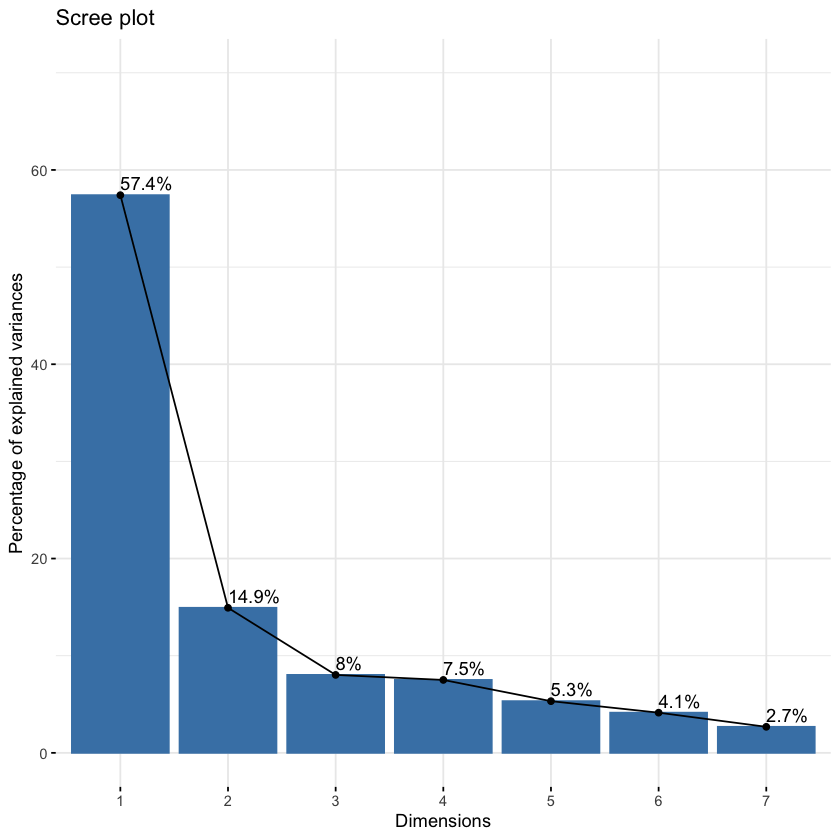

In [8]:
fviz_eig(res_pca, addlabels = TRUE, ylim = c(0, 70))

También podemos visualizar la varianza acumulada:

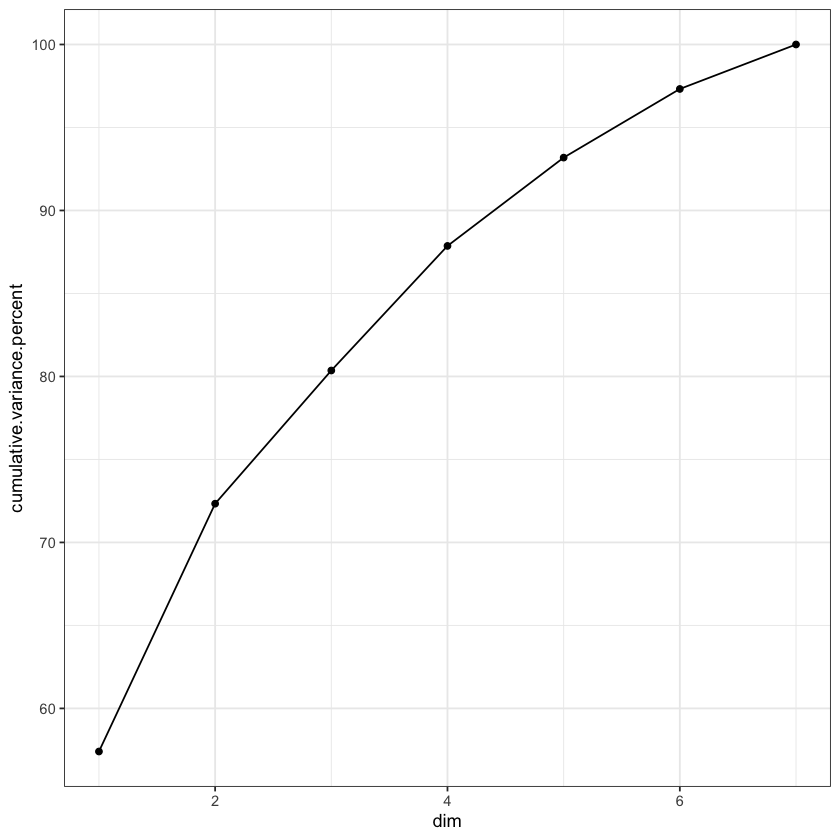

In [9]:
eig_val$dim<-seq(1:7)
ggplot(data=eig_val,aes(x=dim,y=cumulative.variance.percent)) +
    geom_point()+
    geom_line() +
    theme_bw()


## Interpretación de las componentes principales


In [10]:
res_pca

Standard deviations (1, .., p=7):
[1] 2.0045568 1.0223246 0.7494389 0.7248582 0.6103161 0.5380344 0.4330818

Rotation (n x k) = (7 x 7):
                            PC1        PC2         PC3        PC4         PC5
wordscore             0.4104296  0.3221509 -0.08282838  0.2203340 -0.56406683
sentscore             0.3159957  0.4940686  0.32540508 -0.7198700  0.17848174
letterscore           0.4040097  0.1264519 -0.27597945  0.3276965  0.76658737
spellscore            0.4294850  0.2767611 -0.11471715  0.2813439 -0.20801712
additions_score       0.3848066 -0.4078762 -0.24164856 -0.2575322 -0.11920383
substractions_score   0.3548314 -0.5153544 -0.24847442 -0.3147293 -0.04656169
multiplications_score 0.3317100 -0.3571765  0.82328169  0.2851725  0.05165280
                               PC6          PC7
wordscore              0.058013773  0.592302045
sentscore              0.007690033 -0.005173901
letterscore           -0.014227263  0.222211132
spellscore             0.068974270 -0.773694307


En la **Tabla de vectores propios**  vemos los **pesos (cargas)** de cada variable sobre cada componente:

### PC1

Para la **primera componente**, todos los pesos son **positivos y similares**, lo que sugiere que esta componente es muy parecida a un **promedio simple** de los siete puntajes. Es decir, la primera componente captura la mayoria de la información contenida en los 7 puntajes y resume el rendimiento general del estudiante.

Que todos los pesos tengan un mismo signo (no importa cual es) nos dice que hay una dimensión común de rendimiento que domina la variabilidad en los datos. En lugar de tratar de interpretar siete puntajes distintos, podemos resumirlos de forma bastante precisa usando una sola variable: la primera componente principal.


### PC2

Para la **segunda componente**, los pesos tienen un patron diferente. Los **cuatro puntajes de lenguaje** tienen pesos negativos y los **tres de matemáticas**, positivos. 

Esta componente está capturando una contraposición o contraste entre dos grupos de variables.

Esto indica que esta componente representa algo como la **diferencia relativa entre habilidades matemáticas y verbales**.



Entonces 


* El **57% de la variación** en los puntajes puede explicarse por una sola variable resumen: el promedio general.
* El **72% de la variación** se puede explicar si consideramos además por separado los puntajes en matemáticas y lenguaje.

En otras palabras, con solo dos componentes principales capturamos casi tres cuartas partes de la información contenida en los siete puntajes individuales.

### Biplot

El biplot es una herramienta visual muy útil en el análisis de componentes principales, ya que permite observar en un mismo gráfico:

 * A los individuos (en este caso, los estudiantes) proyectados en el espacio de los primeros dos componentes principales.

 * A las variables originales (los siete puntajes del test), representadas como vectores.

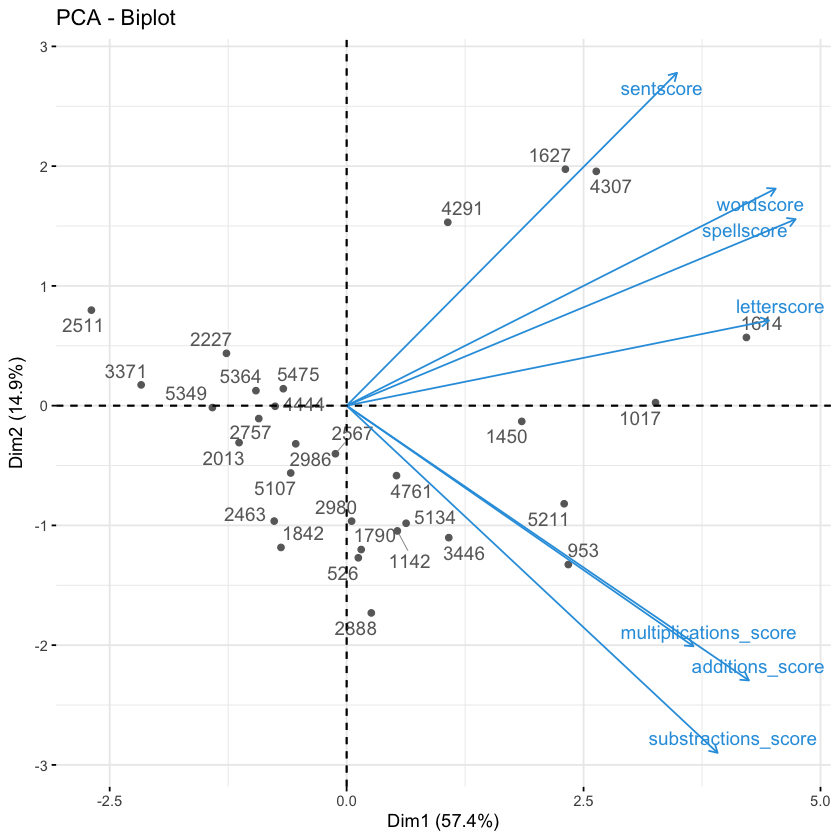

In [11]:
set.seed(123)  # Fijar semilla para reproducibilidad


# Seleccionar algunos individuos aleatoriamente (faster)
subset_ids <- sample(1:dim(dta)[1], 30)

fviz_pca_biplot(res_pca, 
                repel = TRUE,# Avoid text overlapping
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969", #"white" #  Individuals color
                select.ind = list(name = subset_ids)
                )

#### ¿Cómo se interpreta?

**1. Posición de los individuos (puntos grises):**
Cada punto representa a un estudiante. Estos son los "scores" o "puntajes principales" de los componentes. Son los valores proyectados sobre PC1 y PC2. Entonces su ubicación refleja su posición en las primeras dos componentes principales:

* Estudiantes que están cerca del centro tienen un rendimiento más promedio.
* Estudiantes alejados del centro tienen rendimientos más extremos (positivos o negativos).
* La dirección de su posición indica si destacan más en habilidades verbales o matemáticas.

Estudiantes que aparecen cerca del centro del biplot (el punto 0,0) no se desvían mucho del promedio del grupo, ni en el rendimiento general (captado por la primera componente), ni en la diferencia entre áreas (captada por la segunda componente). Es decir, tienen un perfil académico bastante "típico" o balanceado.

In [12]:
dta[2567,]

,wordscore,sentscore,letterscore,spellscore,additions_score,substractions_score,multiplications_score
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2567,4,4,32,0,3,4,1


In [13]:
summary(dta)

   wordscore        sentscore       letterscore      spellscore    
 Min.   : 0.000   Min.   : 0.000   Min.   : 0.00   Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.: 0.000   1st Qu.: 6.00   1st Qu.: 0.000  
 Median : 2.000   Median : 2.000   Median :18.00   Median : 0.000  
 Mean   : 5.841   Mean   : 4.292   Mean   :22.21   Mean   : 2.241  
 3rd Qu.:10.000   3rd Qu.: 6.000   3rd Qu.:35.00   3rd Qu.: 4.000  
 Max.   :24.000   Max.   :38.000   Max.   :70.00   Max.   :10.000  
 additions_score substractions_score multiplications_score
 Min.   :0.000   Min.   :0.000       Min.   :0.0000       
 1st Qu.:2.000   1st Qu.:1.000       1st Qu.:0.0000       
 Median :4.000   Median :3.000       Median :0.0000       
 Mean   :3.661   Mean   :3.134       Mean   :0.7632       
 3rd Qu.:5.000   3rd Qu.:5.000       3rd Qu.:2.0000       
 Max.   :9.000   Max.   :9.000       Max.   :6.0000       

In [14]:
dta[953,]

,wordscore,sentscore,letterscore,spellscore,additions_score,substractions_score,multiplications_score
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
953,16,1,29,5,6,7,2




**2. Dirección y longitud de las flechas (variables):**
Cada flecha representa una de las variables originales (los puntajes en secciones del test).

* **La dirección de la flecha** indica hacia dónde crece el valor de esa variable.
* **La longitud de la flecha** indica el peso de la variable en el componente

**3. Ángulo entre flechas:**

* Si dos flechas apuntan en la **misma dirección**, las variables están **positivamente correlacionadas**.
* Si forman un **ángulo de 90°**, las variables son **no correlacionadas**.
* Si apuntan en **direcciones opuestas**, están **negativamente correlacionadas**.

En nuestro caso

* Las flechas correspondientes a los **puntajes de lenguaje**  estén agrupadas y apunten en una dirección similar.
* Lo mismo ocurre con las de **matemáticas**, pero en dirección opuesta a las de lenguaje en la segunda componente.
* Esto refuerza la interpretación de la segunda componente como una especie de contraste entre habilidades matemáticas y verbales.



##  Votos en el congreso de Estados Unidos

Este es un ejemplo un poco mas complejo de como votan los miembros del Congreso de Estados Unidos. 

Tenemso información de los votos del 111vo Congreso que cubre los años 2009 y 2010, que son los dos primeros años de la presidencia de Obama.

Hay 445 miembros que votan en la casa de representantes (US House of Representatives) y se registraron 1647 votos con -1 por el negativo, +1 por positivo, y 0 por la abstencion o la ausencia

In [15]:
votes <- read.csv("https://github.com/ignaciomsarmiento/datasets/raw/main/rollcall-votes.csv")
head(votes)

,Vote.1,Vote.2,Vote.3,Vote.4,Vote.5,Vote.6,Vote.7,Vote.8,Vote.9,Vote.10,⋯,Vote.1638,Vote.1639,Vote.1640,Vote.1641,Vote.1642,Vote.1643,Vote.1644,Vote.1645,Vote.1646,Vote.1647
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
BONNER (R AL-1),-1,1,-1,0,0,1,-1,-1,1,1,⋯,-1,0,-1,-1,-1,-1,0,1,1,0
BRIGHT (D AL-2),1,-1,1,1,1,1,-1,-1,1,1,⋯,1,1,0,0,0,0,0,0,0,0
ROGERS (R AL-3),-1,1,-1,-1,-1,1,-1,-1,1,1,⋯,-1,-1,-1,-1,-1,1,-1,-1,1,1
ADERHOLT (R AL-4),-1,1,-1,-1,1,1,-1,-1,1,1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,1,1
GRIFFITH (D/R AL-5),1,-1,1,1,1,-1,-1,-1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
BACHUS (R AL-6),-1,1,-1,1,1,1,-1,0,1,1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,1,-1


In [16]:
dim(votes)

[1]  445 1647

In [17]:
legis <- read.csv("https://github.com/ignaciomsarmiento/datasets/raw/main/rollcall-members.csv")
head(legis)

,member,state,party
,<chr>,<chr>,<chr>
1,BONNER (R AL-1),AL,R
2,BRIGHT (D AL-2),AL,D
3,ROGERS (R AL-3),AL,R
4,ADERHOLT (R AL-4),AL,R
5,GRIFFITH (D/R AL-5),AL,DR
6,BACHUS (R AL-6),AL,R


En este contexto podriamos pensar para una estructura factorial subjacente de baja dimensión. Aunque cada uno de los votos se refiere a temas diferentes, los representantes suelen están alineados según ejes partidistas e ideológicos (por ejemplo, republicano versus demócrata o liberal versus conservador). Si creemos que todos los votos son partidistas, entonces el voto por el miembro i en el tema j podría predecirse como

$$
x_{i} = h f_i
$$

donde f es el posicionamiento ideologico latente y h como este posicionamiento afecta los votos. Este tipo de situaciones es ideal para PCA

In [18]:
#Estimamos PCA
pcavote <- prcomp(votes, scale=TRUE)

pcavote$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC436,PC437,PC438,PC439,PC440,PC441,PC442,PC443,PC444,PC445
Vote.1,0.0392185821,-0.0052814541,-0.0008821592,-0.0117965967,0.0002234136,2.999469e-02,-1.090707e-03,-0.0026042631,-0.009523944,0.006486599,⋯,-0.0212793756,-0.0107902248,-0.0301143828,-0.020240273,-0.0069774850,-0.008754050,-0.0041422823,0.024651573,-0.043466380,0.914865391
Vote.2,-0.0391977117,0.0032592190,0.0008552094,0.0119564321,-0.0014956698,-2.882768e-02,7.597981e-04,0.0011994905,0.010585114,-0.009037791,⋯,0.0069393063,-0.0042546377,0.0132455132,0.019822224,-0.0115884166,-0.010676636,-0.0215602171,0.056161912,0.016055304,-0.023022852
Vote.3,0.0381410874,-0.0044353607,-0.0001600903,-0.0106797268,0.0034774543,3.353233e-02,1.066685e-05,-0.0069603353,-0.012714053,0.010662978,⋯,-0.0356690409,0.0002374927,0.0261320869,-0.007325811,0.0214683750,0.035740010,0.0036534767,-0.072064709,-0.036380009,0.052993002
Vote.4,0.0203992707,0.0082194904,-0.0280883389,0.0389080492,0.0183515726,-4.768084e-03,-2.677192e-03,0.0704461703,-0.001643367,-0.032532043,⋯,-0.0108651511,0.0343440430,-0.0521666257,-0.016195281,0.0077677227,0.001940784,0.0217344758,-0.025171122,0.015689614,-0.113911670
Vote.5,0.0147399686,0.0169888169,-0.0316774462,0.0515466564,-0.0340640434,1.020201e-03,2.167432e-02,0.0545236565,-0.020209752,-0.039871415,⋯,-0.0249034577,0.0095515528,0.0183592390,0.004744497,-0.0226384179,0.005184316,-0.0141080610,-0.021946415,0.020099933,0.032133061
Vote.6,-0.0383793547,0.0045961508,-0.0002815467,0.0166070856,0.0040331077,-8.138595e-03,-3.470207e-03,0.0077584251,0.003922493,-0.004970230,⋯,-0.0241409880,-0.0076464209,0.0032134638,-0.013894853,-0.0060208176,-0.024922080,-0.0412765022,0.029405692,-0.005844300,-0.161119107
Vote.7,0.0377997580,-0.0045300307,-0.0027346688,-0.0001670661,0.0096342291,1.590377e-02,-1.299722e-03,0.0056927282,0.009770811,0.006116563,⋯,-0.0098752146,-0.0155259383,-0.0149488764,-0.009285142,-0.0188701537,0.004363155,-0.0018068685,0.083311723,-0.045786254,-0.063679554
Vote.8,0.0380978333,-0.0058386593,-0.0008119522,-0.0104878232,0.0030469251,1.636814e-02,5.155197e-03,-0.0068556508,-0.009313019,0.001804481,⋯,-0.0028414330,-0.0070280371,0.0140515722,0.023684427,0.0041090795,-0.004897517,-0.0093436615,0.048934548,-0.031210393,-0.031959037
Vote.9,-0.0045462197,0.0222313274,-0.0250906383,0.0039177561,-0.0192115406,7.794234e-02,3.990486e-02,-0.0057765206,-0.008100532,-0.003125013,⋯,0.0504129746,-0.0142633078,0.0042573822,0.025273132,-0.0340559394,0.013050845,0.0022509701,-0.034213448,0.030537844,0.009245986
Vote.10,0.0020402433,0.0336133082,-0.0296609660,-0.0213705319,0.0267938017,7.128690e-03,5.273481e-02,0.0226609217,-0.023839753,-0.027991486,⋯,0.0236167142,0.0008553311,-0.0180307324,-0.011297842,-0.0091911928,0.022595819,0.0240169982,-0.064747505,0.010313724,0.027161826


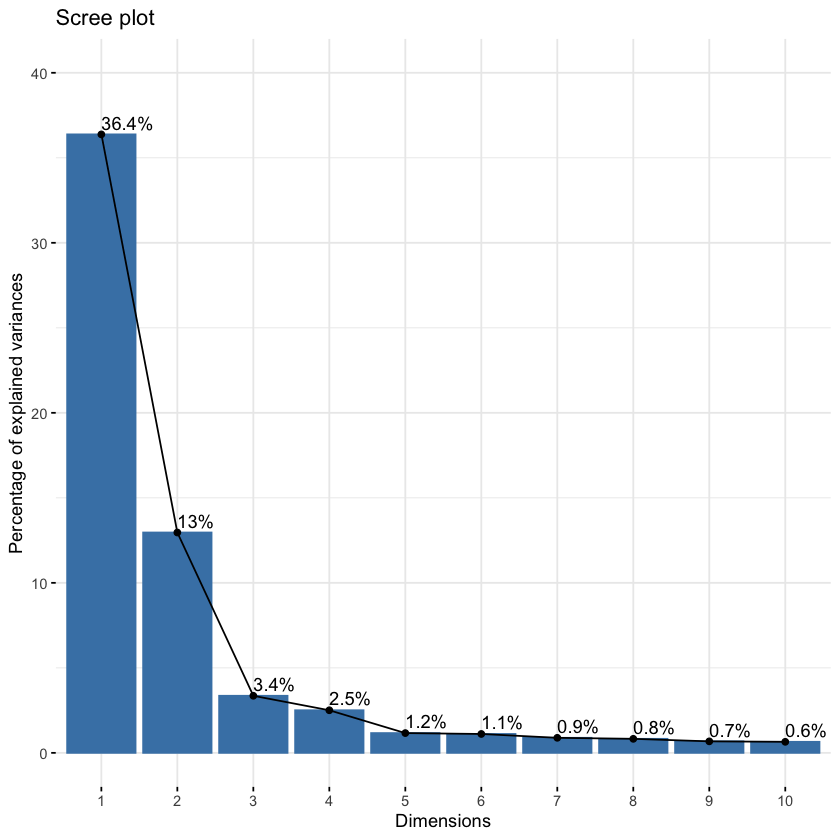

In [19]:
fviz_eig(pcavote, addlabels = TRUE, ylim = c(0, 40))

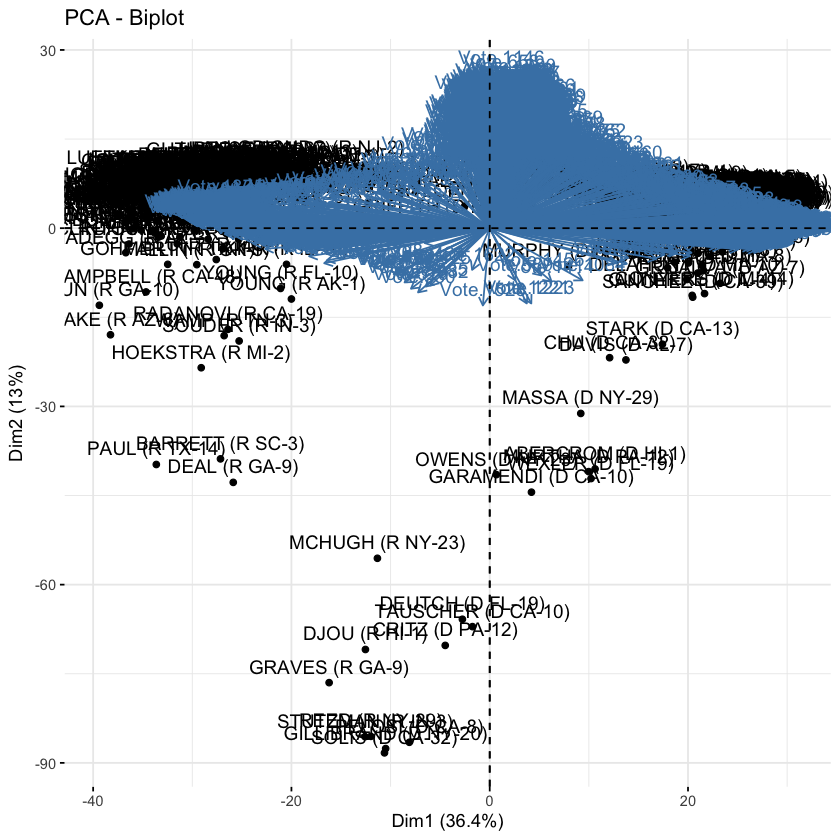

In [20]:
fviz_pca_biplot(pcavote)

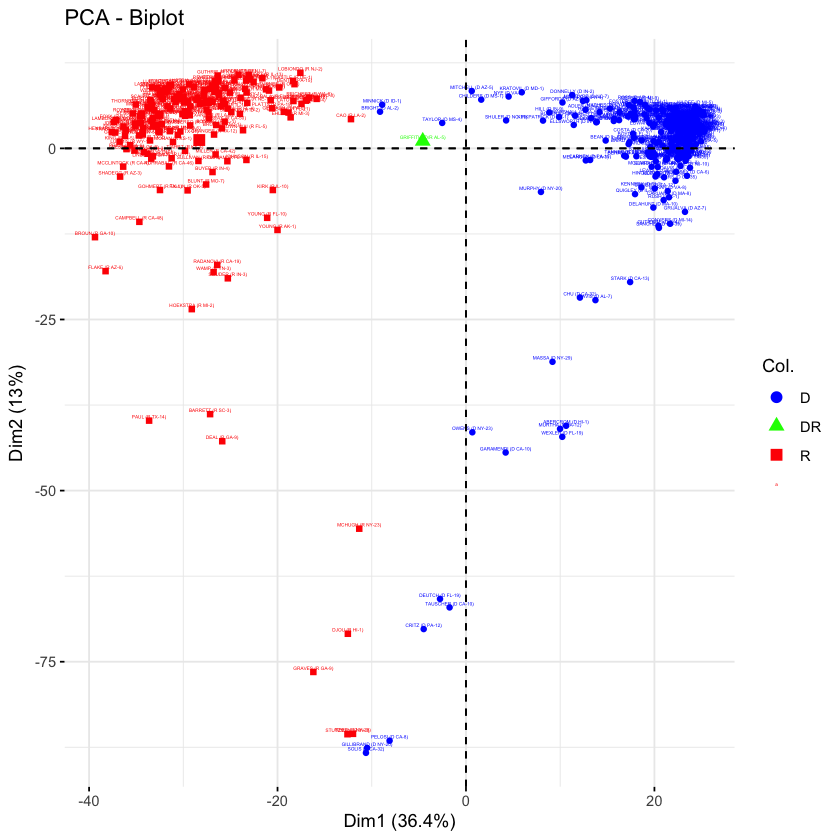

In [21]:
fviz_pca_biplot(pcavote, 
                col.ind = legis$party,
                palette = c("blue", "green", "red"),
                invisible ="var",
                repel=FALSE,
                labelsize = 1
                )

In [22]:
votepc <- predict(pcavote) #
votepc[order(votepc[,1])[1:5],1]

BROUN (R GA-10)     FLAKE (R AZ-6) HENSARLIN (R TX-5)   LAMBORN (R CO-5) 
         -39.37394          -38.25067          -37.58706          -37.37032 
   FRANKS (R AZ-2) 
         -37.22842

In [23]:
votepc[order(-votepc[,1])[1:5],1]

EDWARDS (D MD-4)    PRICE (D NC-4)   MATSUI (D CA-5) SCHAKOWS (D IL-9) 
         25.29151          25.15912          25.12481          24.98754 
  HIRONO (D HI-2) 
         24.98547

In [24]:
votepc[order(votepc[,2])[1:5],2]

SOLIS (D CA-32) GILLIBRAND (D NY-20)      PELOSI (D CA-8) 
           -88.31351            -87.58872            -86.53586 
   STUTZMAN (R IN-3)       REED (R NY-29) 
           -85.59217            -85.53636

In [25]:
votepc[order(-votepc[,2])[1:5],2]

LOBIONDO (R NJ-2)    UPTON (R MI-6)    LANCE (R NJ-7)  GUTHRIE (R KY-2) 
         11.04252          10.74400          10.74006          10.64870 
BIGGERT (R IL-13) 
         10.23859

In [26]:
loadings <- pcavote$rotation[,1:2]

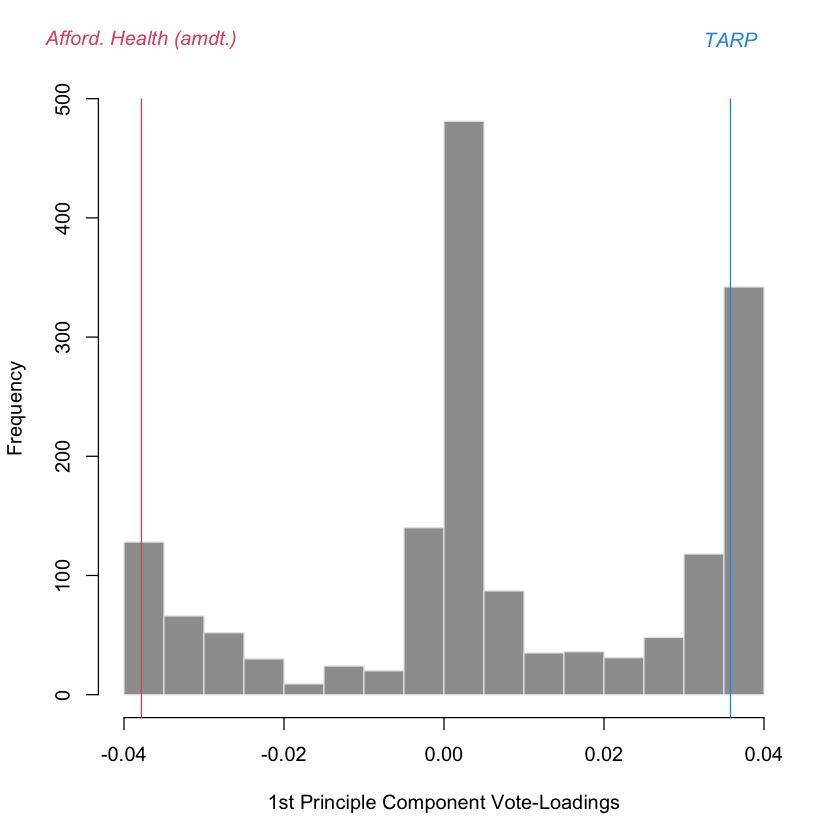

In [27]:
hist(loadings[,1], main="", xlab="1st Principle Component Vote-Loadings",
     col=8, border=grey(.9))
abline(v=loadings[884,1], col=2)
text(x=loadings[884,1], y=550, "Afford. Health (amdt.)", xpd=TRUE, col=2, font=3)
abline(v=loadings[25,1], col=4)
text(x=loadings[25,1], y=550, "TARP", xpd=TRUE, col=4, font=3)

In [28]:
loadings[order(abs(loadings[,2]), decreasing=TRUE)[1:5],2]

Vote.1146   Vote.658  Vote.1090  Vote.1104  Vote.1149 
0.05605862 0.05461947 0.05300806 0.05168382 0.05155729

In [29]:
sort(rowSums(votes==0), decreasing=TRUE)[1:5]

SOLIS (D CA-32) GILLIBRAND (D NY-20)       REED (R NY-29) 
                1628                 1619                 1562 
   STUTZMAN (R IN-3)      PELOSI (D CA-8) 
                1557                 1541

# Regresión por Componentes Principales (PCR)

Ahora que ya sabemos cómo ajustar modelos de factores, ¿para qué sirven?

- En algunos contextos, como el ejemplo de ciencias políticas, los factores tienen un significado claro y ayudan a entender sistemas complejos.
- Más comúnmente, sin embargo, los factores pueden no tener una interpretación clara.
- Aun así, pueden ser útiles como insumos en un sistema de regresión.
- De hecho, esta es una de las principales aplicaciones prácticas del PCA: ser la primera etapa en la Regresión por Componentes Principales (PCR).



La idea detrás de la PCR es simple:

- En lugar de ajustar un modelo \( y \sim X \), 
- Se usan un conjunto reducido de componentes principales (PCs) como regresores.

Esto es útil por varias razones:

- El PCA reduce la dimensionalidad del problema, lo cual suele ser beneficioso.
- Los componentes principales son independientes, por lo tanto, no hay multicolinealidad y la regresión final es más fácil de ajustar.

## Algoritmo paso a paso de la PCR

El procedimiento es sencillo:

1. Aplicar PCA a las variables predictoras \( X \)
2. Extraer los primeros K componentes principales
3. Ajustar una regresión lineal de y sobre los componentes

### Limitaciones de la PCR

- La PCR se basa en los componentes principales de \( X \), que capturan las mayores fuentes de variación en los datos.
- Si la variable de interés \( y \) está relacionada con esas fuentes dominantes de variación, la PCR funcionará bien.
- Pero si \( y \) depende de una pequeña cantidad de variables específicas (una "aguja en un pajar"), la PCR podría no funcionar bien.
- En la práctica, es difícil saber de antemano qué escenario se tiene. Por eso, conviene comparar PCR con otras alternativas como LASSO directamente sobre los \( X \).

## ¿Cuántos componentes principales usar?

Cuando usamos PCA solo para reducir la dimensión, teníamos algunas reglas para elegir el número de componentes.

¿Deberíamos aplicar lo mismo aquí?

En la PCR el enfoque es un poco diferente:

- Se calculan \( min(n-1, p) \) componentes.
- Luego se hace validación cruzada (por ejemplo K-fold) agregando un PC a la vez.
- Se elige el modelo que minimiza el error cuadrático medio fuera de muestra (MSE).

Como los PCs están ordenados por varianza explicada y son independientes, este procedimiento suele funcionar mejor que seleccionar subconjuntos directamente sobre las variables originales.

### Estrategias híbridas con LASSO

- Una alternativa práctica: ajustar una regresión LASSO sobre todos los componentes principales.
- Este enfoque facilita la inclusión de información adicional.

Por ejemplo:

- Incluir tanto los PCs como las variables \( X \) originales en la matriz del modelo LASSO.
- Esto permite que el modelo aproveche tanto la estructura latente (los factores) como señales específicas de variables individuales relacionadas con \( y \).
- Esta estrategia híbrida soluciona la principal desventaja de la PCR: que sólo captura las principales fuentes de variación de \( X \).


## Ejemplo prediccion de ratings

Para ilustrar vamos a usar datos de television que incluyen respuestas a encuestas para grupos focales sobre programas piloto de televisión (primeros episodios de una nueva serie), así como los resultados del primer año de calificaciones (cuántas personas terminaron viendo el programa). 

La esperanza es que podamos a predecir el interés de los espectadores a partir de encuestas piloto, ayudando así a los estudios a tomar mejores decisiones de programación. 


## Datos de programas

In [30]:
shows <- read.csv("https://github.com/ignaciomsarmiento/datasets/raw/main/nbc_showdetails.csv", row.names=1)
shows$Genre <- factor(shows$Genre)
head(shows)

,Network,PE,GRP,Genre,Duration
,<chr>,<dbl>,<dbl>,<fct>,<int>
Living with Ed,HGTV,54.0000,151.0,Reality,30
Monarch Cove,LIFE,64.6479,375.5,Drama/Adventure,60
Top Chef,BRAVO,78.5980,808.5,Reality,60
Iron Chef America,FOOD,62.5703,17.3,Reality,30
Trading Spaces: All Stars,TLC,56.0000,44.1,Reality,60
Lisa Williams: Life Among the Dead,LIFE,56.2056,382.6,Reality,60


Tenemos un par de variables de resultado interesantes. 
- Los puntos de rating bruto (GRP) proporcionan un recuento estimado de la audiencia total. 
- Compromiso proyectado (PE) como una medida más sutil de la atención de la audiencia.

Después de ver un programa, se contacta a los espectadores y se les pregunta sobre el orden y los detalles de los eventos del programa. Esto mide su compromiso con el programa (y, quizás lo más importante, con los anuncios mostrados). La PE se informa en una escala de 0 a 100, donde 100 significa que estaban completamente comprometidos y 0 significa que no prestaron atención en absoluto.


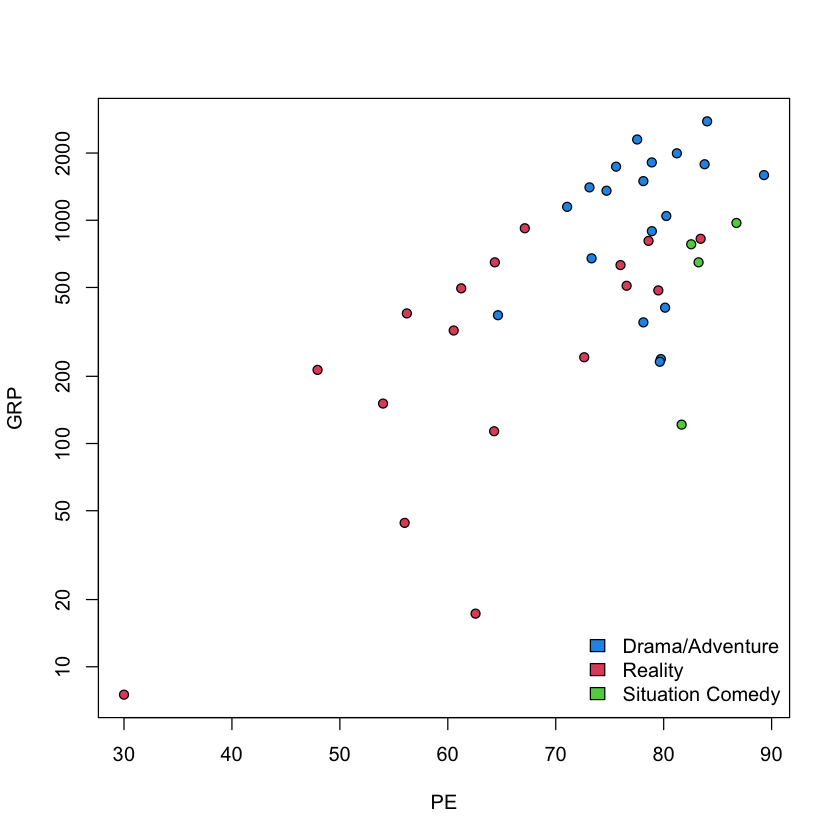

In [31]:
plot(GRP ~ PE, data=shows, bg=c(4,2,3)[shows$Genre], pch=21, log="y")
legend("bottomright", legend=levels(shows$Genre), fill=c(4,2,3), bty="n")

La figura mustra que en general una mayor interacción suele corresponder a mayores índices de audiencia, pero que las comedias pueden tener una alta interacción con índices de rating más bajos. Los realities tienden a tener menor interacción y audiencia (pero son económicos de producir).

## Datos de la encuesta

Los datos de la encuesta incluyen 6241 vistas y 20 preguntas para 40 programas. Hay dos tipos de preguntas en la encuesta. Ambos  preguntan hasta qué punto estás de acuerdo con una afirmación. 

- Para la primer grupo de preguntas (Q1) esta afirmación toma la forma de "Este programa me hace sentir...".
- Para el segundo grupo de preguntas (Q2), la afirmación es "Encuentro que este programa me hace sentir...". 



In [32]:
survey <- read.csv("https://github.com/ignaciomsarmiento/datasets/raw/main/nbc_pilotsurvey.csv", as.is=TRUE) 
survey$Show <- factor(survey$Show, levels=rownames(shows))
head(survey)

,Viewer,Show,Q1_Attentive,Q1_Excited,Q1_Happy,Q1_Engaged,Q1_Curious,Q1_Motivated,Q1_Comforted,Q1_Annoyed,⋯,Q2_Funny,Q2_Confusing,Q2_Predictable,Q2_Entertaining,Q2_Fantasy,Q2_Original,Q2_Believable,Q2_Boring,Q2_Dramatic,Q2_Suspenseful
,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,71,Iron Chef America,3,4,4,3,5,4,3,2,⋯,2,2,4,3,1,3,5,2,2,4
2,71,Trading Spaces: All Stars,4,4,3,4,5,2,3,3,⋯,3,1,3,4,2,4,4,2,3,4
3,71,House Hunters,4,4,4,5,5,3,3,2,⋯,4,2,3,5,4,5,2,1,4,4
4,71,What Not to Wear,4,3,3,3,4,2,2,4,⋯,3,2,5,4,4,3,3,2,3,4
5,71,America's Next Top Model,4,4,3,4,4,4,3,3,⋯,2,1,3,4,2,3,3,2,3,3
6,73,Next,2,4,2,4,2,3,3,3,⋯,4,1,4,5,3,2,1,3,5,2


In [33]:
dim(survey)

[1] 6241   22

Pareciera que tenemos muchos datos 6231 personas que vieron el pilot, per en realidad solo hay 40  programas con 20 preguntas y hay dos variables potenciales a predecir: GRP y PE.

Para relacionar los resultados de las encuestas al performance del programa, primero tenemos que calcuar el promedio para las respuestas de la encuesta por show:

In [34]:
Xpilot <- aggregate(survey[,-(1:2)],  ## -(1:2) to remove the variables 'show' and 'viewer' completely
                by=list(Show=survey$Show), mean)


rownames(Xpilot) <- Xpilot[,1]
Xpilot <- Xpilot[,-1]
head(Xpilot)

,Q1_Attentive,Q1_Excited,Q1_Happy,Q1_Engaged,Q1_Curious,Q1_Motivated,Q1_Comforted,Q1_Annoyed,Q1_Indifferent,Q2_Relatable,Q2_Funny,Q2_Confusing,Q2_Predictable,Q2_Entertaining,Q2_Fantasy,Q2_Original,Q2_Believable,Q2_Boring,Q2_Dramatic,Q2_Suspenseful
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Living with Ed,3.890244,3.780488,3.926829,3.865854,3.804878,3.609756,3.573171,2.609756,3.121951,3.719512,3.926829,2.560976,3.402439,4.134146,3.353659,3.914634,3.878049,2.621951,3.512195,3.500000
Monarch Cove,4.046154,3.861538,3.830769,3.876923,4.000000,3.938462,3.907692,2.969231,3.153846,3.984615,3.784615,2.769231,3.461538,4.107692,3.338462,4.153846,3.876923,2.553846,4.015385,3.707692
Top Chef,3.845745,3.595745,3.632979,3.771277,3.856383,3.196809,3.000000,2.191489,2.398936,3.218085,3.569149,1.840426,2.851064,4.297872,2.489362,3.845745,3.547872,1.829787,3.606383,3.180851
Iron Chef America,3.910053,3.693122,3.613757,3.851852,3.936508,3.333333,3.047619,2.116402,2.439153,3.132275,3.539683,1.947090,2.878307,4.227513,2.513228,3.777778,3.687831,1.915344,3.560847,3.269841
Trading Spaces: All Stars,3.807487,3.540107,3.513369,3.780749,3.909091,3.294118,2.802139,2.101604,2.427807,3.229947,3.481283,1.871658,2.754011,4.149733,2.304813,3.839572,3.780749,1.855615,3.310160,3.016043
Lisa Williams: Life Among the Dead,3.716216,3.648649,3.554054,3.662162,3.756757,3.567568,3.378378,2.202703,2.581081,3.472973,3.378378,2.216216,2.770270,4.000000,3.013514,3.878378,3.797297,1.905405,3.756757,3.527027


Esto nos deja con una matris X con las siguientes dimensions

In [35]:
dim(Xpilot)

[1] 40 20

Podemos hacer PCA

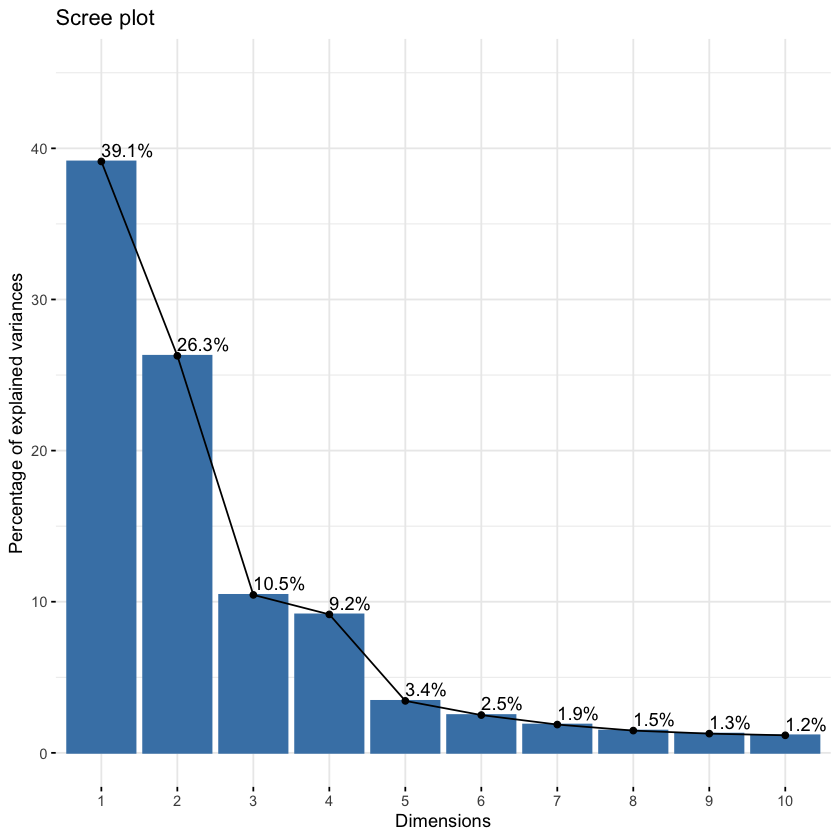

In [36]:
PCApilot <- prcomp(Xpilot, scale=TRUE)

fviz_eig(PCApilot, addlabels = TRUE, ylim = c(0, 45))

Veamos los 2 primerosloadings o rotaciones:

In [37]:
round(PCApilot$rotation[,1:3],2)

,PC1,PC2,PC3
Q1_Attentive,-0.34,0.00,-0.01
Q1_Excited,-0.31,-0.13,-0.09
Q1_Happy,-0.13,-0.24,-0.48
Q1_Engaged,-0.34,0.03,-0.05
Q1_Curious,-0.29,0.00,0.13
Q1_Motivated,-0.24,-0.25,0.03
Q1_Comforted,-0.14,-0.36,-0.07
Q1_Annoyed,0.20,-0.27,0.13
Q1_Indifferent,0.17,-0.35,0.13
Q2_Relatable,-0.09,-0.31,-0.06


El PC1 parece que es un factor que captura "cuan mucho le disgusta el programa" (el negativo sería cuan mucho me gusta). Un programa obtiene una puntuación baja en el primer componente principal (PC1) si hizo que los espectadores se sintieran emocionados y comprometidos, y si el contenido era original, entretenido y con suspenso. Un programa obtiene una puntuación alta en PC1 si las personas lo encontraron molesto y aburrido.

El segundo componente principal (PC2) es menos fácil de interpretar: obtienes una puntuación alta en PC2 si encuentras el programa aburrido, confuso y predecible, pero también si lo encuentras gracioso.

Veamos si un Biplot nos puede ayudar un poco mas: 

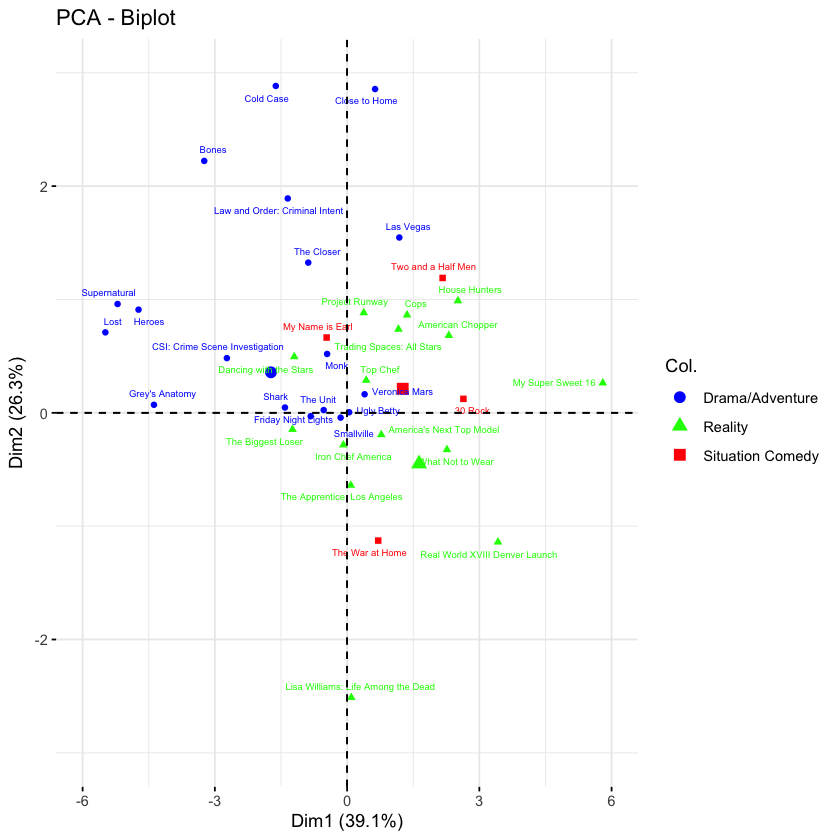

In [38]:
fviz_pca_biplot(PCApilot, 
                col.ind = shows$Genre,
                palette = c("blue", "green", "red"),
                ylim=c(-3,3),
                xlim=c(-6,6), # hides "monarch cove",living with ed", and "next" but these are all tiny 
                invisible ="var",
                repel=TRUE,
                labelsize = 2
                )


Los programas de "reality" obtienen loadings altos tanto en PC1 como en PC2—son poco agradables y pueden ser molestos pero graciosos—mientras que los dramas con guion obtienen puntuaciones bajas en ambos.


## Lasso Regressions 

Veamos ahora si podemos predecir engagement (PE)

In [39]:
p_load("gamlr")

In [40]:
zpilot <- predict(PCApilot)

PE <- shows$PE
zdf <- as.data.frame(zpilot)

summary(PEglm <- glm(PE ~ ., data=zdf[,1:2]))


Call:
glm(formula = PE ~ ., data = zdf[, 1:2])

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  72.6831     1.4370  50.580  < 2e-16 ***
PC1          -2.6401     0.5202  -5.075 1.12e-05 ***
PC2           1.5029     0.6349   2.367   0.0233 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 82.59648)

    Null deviance: 5646.5  on 39  degrees of freedom
Residual deviance: 3056.1  on 37  degrees of freedom
AIC: 294.96

Number of Fisher Scoring iterations: 2


### Solo X

In [41]:
cvlasso <- cv.gamlr(x=as.matrix(Xpilot), y=PE, nfold=10)
coef(cvlasso) 

21 x 1 sparse Matrix of class "dgCMatrix"
                     seg10
intercept       19.7257507
Q1_Attentive     .        
Q1_Excited       .        
Q1_Happy         .        
Q1_Engaged       8.1643846
Q1_Curious       .        
Q1_Motivated     .        
Q1_Comforted     .        
Q1_Annoyed      -2.7296773
Q1_Indifferent   .        
Q2_Relatable     .        
Q2_Funny         .        
Q2_Confusing     .        
Q2_Predictable   .        
Q2_Entertaining  6.9747097
Q2_Fantasy       .        
Q2_Original      .        
Q2_Believable    .        
Q2_Boring       -0.9549142
Q2_Dramatic      .        
Q2_Suspenseful   .        

### Solo PCs

In [42]:
cvlassoPCR <- cv.gamlr(x=zpilot, y=PE, nfold=10) 
coef(cvlassoPCR) 

21 x 1 sparse Matrix of class "dgCMatrix"
               seg25
intercept 72.6830750
PC1       -1.7755724
PC2        0.4478384
PC3       -0.5772248
PC4        .        
PC5        .        
PC6        .        
PC7        2.6726162
PC8        .        
PC9        .        
PC10       .        
PC11       .        
PC12       .        
PC13       .        
PC14       .        
PC15       .        
PC16      -8.6206795
PC17       .        
PC18       .        
PC19       .        
PC20       .        

### Ambos

In [43]:
cvlassoboth <- cv.gamlr(x=as.matrix(cbind(Xpilot,zpilot)), y=PE, nfold=10)
coef(cvlassoboth)

41 x 1 sparse Matrix of class "dgCMatrix"
                      seg25
intercept       -28.4128754
Q1_Attentive      .        
Q1_Excited        .        
Q1_Happy          .        
Q1_Engaged       13.3747251
Q1_Curious        .        
Q1_Motivated      .        
Q1_Comforted      .        
Q1_Annoyed       -6.2248486
Q1_Indifferent    .        
Q2_Relatable      .        
Q2_Funny          .        
Q2_Confusing      .        
Q2_Predictable   -0.9697748
Q2_Entertaining  16.3721394
Q2_Fantasy        .        
Q2_Original       .        
Q2_Believable     .        
Q2_Boring        -1.5457881
Q2_Dramatic       .        
Q2_Suspenseful    .        
PC1               .        
PC2               .        
PC3               .        
PC4               .        
PC5               .        
PC6               .        
PC7               2.2202883
PC8               .        
PC9               .        
PC10              .        
PC11              .        
PC12              .        
PC13  

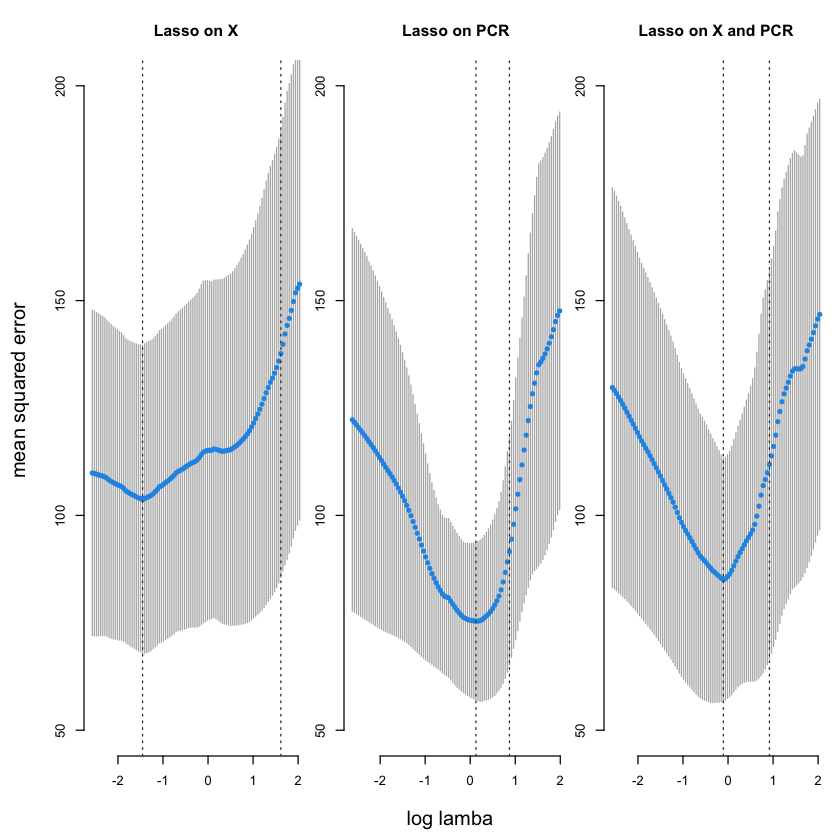

In [44]:
par(mfrow=c(1,3), mai=c(.2,.2,.5,.1), omi=c(.5,.5,0,0))
plot(cvlasso, main="Lasso on X", ylim=c(50,200), ylab="", xlab="", df=FALSE, bty="n")
plot(cvlassoPCR, main="Lasso on PCR", ylim=c(50,200), ylab="", xlab="", df=FALSE, bty="n")
plot(cvlassoboth, main="Lasso on X and PCR", ylim=c(50,200), ylab="", xlab="", df=FALSE, bty="n")
mtext(side=2, "mean squared error", outer=TRUE, line=2)
mtext(side=1, "log lamba", outer=TRUE, line=2)

# Texto como Datos: Ejemplos

## Regresión con Texto: Gentzkow and Shapiro

Vamos a usar los datos del estudio de Gentzkow y Shapiro [2010], que analiza cómo los periódicos ajustan su contenido según la orientación política de sus lectores.


<div >
<img src = "figures/gentzgow_shapiro.png" />
</div>

Cargamos los paquetes

In [45]:
require("pacman")
p_load("tidyverse","textir","wordcloud")

El conjunto de datos resume el primer año del 109º Congreso de los Estados Unidos (2005) e incluye todos los discursos de ese año de los miembros de la Cámara de Representantes y del Senado.

El texto ya está tokenizado en *bigrams* , después de eliminar las *stopwords* y aplicar un algoritmo de lematización (usando el *Porter stemmer*).

In [46]:
data("congress109", package = "textir")

La matriz `congress109Counts` contiene el número de veces que cada una de las 1000 frases más comunes fue utilizada en el 109º Congreso por cada uno de los 529 miembros del Congreso (Cámara y Senado). 

Es decir, cada documento corresponde a la transcripción combinada de todos los discursos de un solo orador.

Podemos inspeccionar los conteos de algunas frases específicas para dos oradores:

In [47]:
congress109Counts[c("Barack Obama","John Boehner"),995:999]

2 x 5 sparse Matrix of class "dgCMatrix"
             stem.cel natural.ga hurricane.katrina trade.agreement
Barack Obama        .          1                20               7
John Boehner        .          .                14               .
             appropriation.bil
Barack Obama                12
John Boehner                 .

Tambien tenemos información sobre  el partido que pertenecen el estado, la camara, y la proporcion de votos que obtuvo Bush en la eleccion presindecial en el distrito/estado de cada representante

In [48]:
congress109Ideology[c("Barack Obama","John Boehner"),1:5]

,name,party,state,chamber,repshare
,<chr>,<fct>,<fct>,<fct>,<dbl>
Barack Obama,Barack Obama,D,IL,S,0.4479136
John Boehner,John Boehner,R,OH,H,0.6456248


Vamos a tratar de predecir estos votos  a partir de como los congresistas hablan. La idea es que el lenguage apela a los votantes: 

In [49]:
as.matrix(congress109Counts[c("Tom Price","William Jefferson"),c("death.tax","estate.tax")])

,death.tax,estate.tax
Tom Price,28,0
William Jefferson,2,32


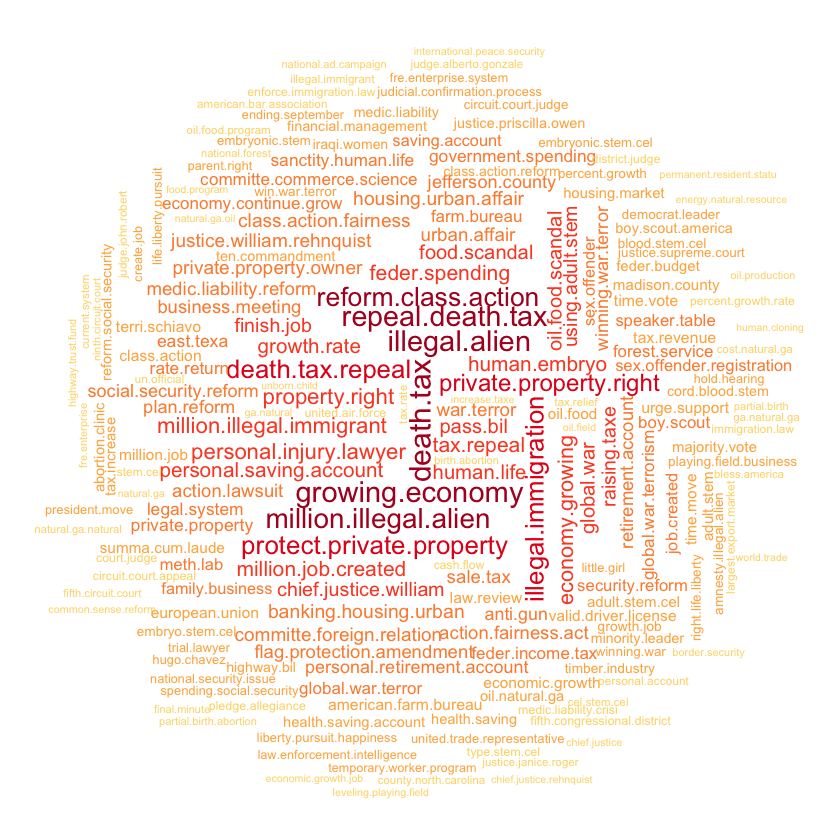

In [52]:
repshare <- congress109Ideology$repshare
X1 <- as.matrix(congress109Counts)
words<-colnames(X1)

covariance<-apply(X1,2,function(x) cor(x,repshare))

                  

wordcloud(words = words,
          freq = covariance,
          min.freq = 0,
          scale = c(1.5, 0.1), 
          max.words=200, 
          random.order=FALSE, 
          colors=brewer.pal(8, "YlOrRd"))

### Regresión 

$$
RepShare= X\beta  + u
$$

In [53]:
# Predictores
X <- as(congress109Counts, "dMatrix")

# Outcome
repshare <- congress109Ideology$repshare

In [54]:
# lasso
lassoslant <- cv.gamlr(X>0, repshare)  

B <- coef(lassoslant$gamlr)[-1,] 

'as(<lgCMatrix>, "dgCMatrix")' is deprecated.
Use 'as(., "dMatrix")' instead.
See help("Deprecated") and help("Matrix-deprecated").



In [55]:
tail(sort(round(B[B!=0],4)),10)

illegal.alien        percent.growth   illegal.immigration 
               0.0079                0.0083                0.0087 
           global.war          look.forward            war.terror 
               0.0098                0.0099                0.0114 
     private.property        action.lawsuit          human.embryo 
               0.0133                0.0142                0.0226 
million.illegal.alien 
               0.0328

In [56]:
head(sort(round(B[B!=0],4)),10)

congressional.black.caucu                 family.value 
                     -0.0839                      -0.0443 
       issue.facing.american           voter.registration 
                     -0.0324                      -0.0298 
     minority.owned.business            strong.opposition 
                     -0.0284                      -0.0264 
                 civil.right        universal.health.care 
                     -0.0259                      -0.0254 
congressional.hispanic.caucu          ohio.electoral.vote 
                     -0.0187                      -0.0183

## Modelado de topicos o temas 

### Ejemplo comentarios en we8there

Para estudiar la factorización de texto, pasaremos de la política a los restaurantes. Contamos con 6166 reseñas, con una extensión promedio de 90 palabras por reseña, del ya desaparecido sitio web de viajes `we8there.com`. 

In [57]:
data("we8there", package = "textir")

Una característica útil de estas reseñas es que contienen texto y una calificación multidimensional sobre la experiencia general, el ambiente, la comida, el servicio y la relación calidad-precio. Cada aspecto se califica en una escala de cinco puntos, donde 1 indica pésimo y 5 indica excelente. 

Por ejemplo, un usuario envió una reseña muy positiva para Waffle House #1258 en Bossier City, Luisiana: 

Waffle House #1258 in Bossier City, Louisiana:

*I normally would not revue a Waffle House but this one deserves it. The workers, Amanda, Amy, Cherry, James and J.D. were the most pleasant crew I have seen. While it was only lunch, B.L.T. and chili, it was great. The best thing was the 50’s rock and roll music, not to loud not to soft. This is a rare exception to what you all think a Waffle House is. Keep up the good work.*

*Overall: 5, Atmosphere: 5, Food: 5, Service: 5, Value: 5.*



Otro usuario encontró que Sartin's Seafood, no es muy bueno:

Sartin’s Seafood in Nassau Bay, Texas,

*Had a very rude waitress and the manager wasn’t nice either.*
*Overall: 1, Atmosphere: 1, Food: 1, Service: 1, Value: 5.*

In [58]:
x <- we8thereCounts
x[1,x[1,]!=0]

even though larg portion  mouth water     red sauc    babi back     back rib 
           1            1            1            1            1            1 
chocol mouss veri satisfi 
           1            1

### PCA

In [59]:
pca <- prcomp(x, scale=TRUE) # cuidado demora mucho

In [60]:
tail(sort(pca$rotation[,1]))

food great     staff veri     excel food high recommend     great food 
   0.007386860    0.007593374    0.007629771    0.007821171    0.008503594 
    food excel 
   0.008736181

In [61]:
tail(sort(pca$rotation[,4]))

order got after minut  never came   ask check readi order drink order 
 0.05918712  0.05958572  0.06099509  0.06184512  0.06776281  0.07980788

### LDA

#### Aside: Ejemplo paso a paso

En este ejemplo vamos a asumir que hay 3 (D), que contienen 3 temas (K) y 7 (V) palabras

- Paso 1: Definir el vocabulario

In [62]:
set.seed(123)

vocabulario <- c("gato", "perro", "vacuna", "hospital", "dinero", "banco", "impuestos")
V <- length(vocabulario)
V

[1] 7

- Paso 2: Definir las distribuciones de palabras por tópico (φ)

Estas salen de una Dirichlet, mas sobre esto abajo

In [63]:
# Cada vector debe tener longitud igual al vocabulario

phi_1 <- c(0.4, 0.4, 0.05, 0.05, 0.03, 0.03, 0.04)  # Animales
phi_2 <- c(0.05, 0.05, 0.4, 0.4, 0.03, 0.03, 0.04)  # Salud
phi_3 <- c(0.05, 0.05, 0.05, 0.05, 0.35, 0.35, 0.10)  # Economía

# Guardamos las distribuciones en una lista
phi <- list(phi_1, phi_2, phi_3)


phi

[[1]]
[1] 0.40 0.40 0.05 0.05 0.03 0.03 0.04

[[2]]
[1] 0.05 0.05 0.40 0.40 0.03 0.03 0.04

[[3]]
[1] 0.05 0.05 0.05 0.05 0.35 0.35 0.10

- Paso 3: Definir mezcla de tópicos del documento (θ)

Ahora si veamos como funciona la Dirichlet. Esta distribución es una de las pocas distribuciones que modela directamente vectores de probabilidades. Es decir, vectores cuyas componentes:

- son no negativas,

- y suman exactamente 1.

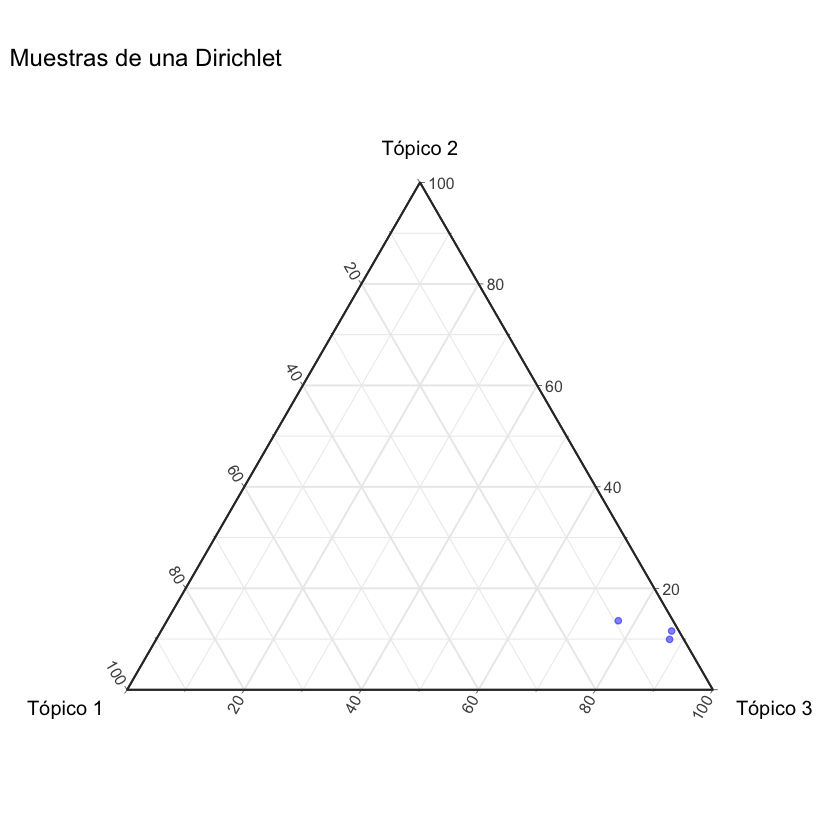

In [64]:

p_load("ggtern")
p_load("MCMCpack")

# Número de muestras
set.seed(123)
D <- 3 #numero de documentos

# Parámetros de la Dirichlet
alpha <- c(1, 1, 20)  # K=3

# Generar muestras
samples <- rdirichlet(D, alpha)
df <- data.frame(Topic1 = samples[,1], Topic2 = samples[,2], Topic3 = samples[,3])

# Graficar puntos de masa
ggtern(data = df, aes(x = Topic1, y = Topic2, z = Topic3)) +
  geom_point(alpha = 0.5, color = "blue", size = 1.5) +
  theme_bw() +
  labs(title = "Muestras de una Dirichlet",
       x = "Tópico 1", y = "Tópico 2", z = "Tópico 3")


In [65]:
df

Topic1,Topic2,Topic3
<dbl>,<dbl>,<dbl>
0.01245440,0.11590329,0.8716423
0.02417974,0.09938618,0.8764341
0.09341521,0.13609342,0.7704914


In [66]:
theta_d <- c(df[1,1], df[1,2], df[1,3])  # de arriba

theta_d

[1] 0.0124544 0.1159033 0.8716423

- Paso 4: Número de palabras en el documento

In [67]:

N <- 10


- Paso 5: Generar los tópicos z_1, ..., z_N

In [68]:


z <- sample(1:3, size = N, replace = TRUE, prob = theta_d)

z

[1] 3 3 3 2 2 3 3 3 3 3

- Paso 6: Generar palabras según los tópicos

In [69]:

w <- character(N)
for (n in 1:N) {
  w[n] <- sample(vocabulario, size = 1, prob = phi[[z[n]]])
}

# Resultado: palabras generadas
print(w)

 [1] "banco"    "banco"    "banco"    "hospital" "vacuna"   "dinero"  
 [7] "dinero"   "banco"    "banco"    "banco"   


- Paso 7: Bag of Words (conteo por palabra)

In [70]:


bow <- table(factor(w, levels = vocabulario))
print(bow)



     gato     perro    vacuna  hospital    dinero     banco impuestos 
        0         0         1         1         2         6         0 


#### Ingenieria reversa

Hasta ahora, simulamos documentos **generando** palabras. Pero en la realidad en la pratica

* Un corpus de documentos reales → textos observados.
* Una representación en BoW o DTM.


Lo que buscamos es inferir los **parámetros** del modelo:

  * Las mezclas de tópicos por documento $\theta_d$,
  * Las distribuciones de palabras por tópico $\phi_k$,
  * Las asignaciones de tópicos $z_{d,n}$ para cada palabra.

Es la ingenieria reversa de MLE: queremos encontrar los parámetros que hacen más **verosímil** (más probable) haber observado nuestros documentos.


$$
\max_{\theta, \phi} \ p(\text{documentos} \mid \theta, \phi)
$$

Pero en LDA no observamos los $z_{d,n}$, ni $\theta$, ni $\phi$. 

**Solo observamos las palabras.**

El problema a resolver es la siguiente verosimilitud:

$$
p(\mathbf{w} \mid \alpha, \beta) = \int \sum_{\mathbf{z}} p(\mathbf{w}, \mathbf{z}, \theta, \phi \mid \alpha, \beta) \ d\theta \ d\phi
$$

Este término **no se puede calcular exactamente**: la suma sobre todas las posibles asignaciones de tópicos $\mathbf{z}$ es **exponencial**.

¿Por qué es "exponencial"?

Porque si: hay $N$ palabras en total en el corpus,  y cada palabra puede tener **uno de $K$ tópicos**, entonces hay: $K^N$ posibles combinaciones de asignaciones de tópicos. Ejemplo: supongamos

* 2 documentos, cada uno con 10 palabras → $N = 20$,
* 3 posibles tópicos → $K = 3$

Entonces hay:

$$
3^{20} = 3,486,784,401
$$

combinaciones posibles de $\mathbf{z}$. 

Entonces

* No podemos **sumar sobre todas** esas posibilidades explícitamente.
* Por eso necesitamos métodos que **aproximen esa suma**:


En la practica hay varios métodos de **inferencia aproximada**, que estiman los parámetros.

Los dos más comunes:

1. **Gibbs Sampling** (una forma de MCMC)
2. **Variational Inference** (una versión determinista, más rápida)


#### Regreso al ejemplo de `we8there`

Vamos a usar `maptpx` de Matt Taddy. El algoritmo esta descipto ["On Estimation and Selection for Topic Models"](https://arxiv.org/pdf/1109.4518), e implementa "Topic Posterior Estimation" usando inferiencia variacional y nos aproxima una solución a:

$$
p(\mathbf{w} \mid \alpha, \beta) 
$$

In [71]:
p_load("maptpx") # para modelar topicos

x <- as.simple_triplet_matrix(we8thereCounts) #Convierte a formato sparse
# Es una estructura sparse  que representa solo los elementos distintos de cero (non-sparse), usando tres vectores:
# i: los índices de fila
# j: los índices de columna
#v: los valores (conteos)

In [72]:
tpc <- topics(x,K=10) 


Estimating on a 6166 document collection.
Fitting the 10 topic model.
log posterior increase: 4441.8, 461.4, 101.5, 57.4, 51, 19.2, 26.2, 15.3, 15.4, 11.7, 6.7, 12.2, 8, 10.1, 4.8, 5.3, 3.2, 6.6, 2.8, 7, 3.6, 3.9, 6.7, 5.5, 8.6, 5, 11, 10.3, 12, 7.9, 12.1, 9, 8.8, 13.9, 8.6, 7.3, 6.1, 4.9, 4.3, 12, 11.1, 8.7, 3.2, 2.8, 5.1, 1.9, 2.6, 2.4, 4.9, 2.9, 1.5, 2.5, 4.7, 1.7, 0.9, 1.4, 0.7, 2.5, 2.2, 1.7, 1, 1.3, 1.5, 2, 0.8, 1.7, 0.5, 0.2, 0.5, 0.6, 0.9, 3.9, 0.5, 0.6, 0.4, 0.2, 0.8, 0.2, 1.4, 0.3, 0.5, 0.6, done.


Podemos comparar multiples K, para determinar el número óptimo de tópicos

In [74]:
tpcs <- topics(x,K=5*(1:5), verb=1)


Estimating on a 6166 document collection.
Fit and Bayes Factor Estimation for K = 5 ... 25
log posterior increase: 2853.9, 327.1, 85.3, 36.7, 25.9, 19.9, 13.8, 11.6, 9.6, 11.4, 20.3, 7.1, 3.9, 8.3, 4, 5.9, 2.4, 3.8, 4.8, 5.3, 3.8, 4.5, 4, 3.8, 2.1, 2, 4.8, 4.5, 2.5, 4.3, 7, 4.9, 9.3, 2.9, 9.9, 3.8, 6.2, 7.3, 3.8, 6, 7.9, 7.4, 7.2, 4, 5.6, 8, 14.3, 11.5, 17.6, 14.8, 14.1, 14.4, 9.5, 7.1, 5.4, 5.8, 2.4, 2.5, 1.5, 1.1, 1.9, 2.9, 2.8, 3.1, 1, 0.8, 0.4, 1.9, 1.3, 0.8, 0.8, 1.1, 1, 2.2, 1, 0.7, 0.4, 0.4, 0.4, 2, 0.4, 0.7, 0.2, 0.3, 2.2, 0.4, 0.3, 0.1, 0.2, done.
log BF( 5 ) = 79521.94
log posterior increase: 4626.7, 197.4, 53, 24.9, 19, 9.3, 7.4, 4.6, 5.2, 3.4, 2.3, 1.7, 0.8, 0.6, 0.9, 0.5, 0.8, 2.6, 2.7, 1, 0.5, 0.3, 1.1, 0.5, 0.6, 0.7, 1.3, 0.2, done.
log BF( 10 ) = 87157.28
log posterior increase: 3445, 170.2, 49.8, 23.6, 14.1, 31.4, 16.2, 4.8, 6.6, 5.5, 1.9, 5.9, 4, 2.5, 1.8, 2.1, 1.3, 0.7, 3.6, 1.1, 1.3, 0.7, 0.9, 1.1, 1.8, 1.3, 0.8, 1, 0.3, 0.7, 0.4, 1.2, 0.7, 0.8, 0.1, done.
log BF( 

El Bayes Factor aqui se refiere a 



$$
 \exp\left(- \text{BIC}\right)  \approx p(\mathbf{w} \mid \alpha, \beta)
$$

entonces:

$$
\log p(\mathbf{w} \mid \alpha, \beta) \approx - \text{BIC}
$$

Entonces si nosotros buscabamos minimizar el BIC, vamos a quere maximizar el BF.

*Aside*: el BIC aqui va a ser

$$
\text{BIC} =  \log \hat{L} - \frac{1}{2} \left[ K(V - 1) + D(K - 1) \right] \cdot \log(n)
$$

* $\hat{L}$: log-likelihood del modelo (`mod$loglik` en `maptpx`)
* $V$: número de palabras en el vocabulario
* $D$: número de documentos
* $K$: número de tópicos
* $n$: número total de palabras en el corpus


La maximización del Bayes Factor en `maptpx` encuentra un valor de $K$ que funciona bien para una variedad de tareas posteriores, aunque a veces tiende a seleccionar un $K$ **más pequeño del que nos gustaría** para fines de *storytelling*

**Como se relaciona con otras medidas?**

##### Perplexity

La **perplejidad** (perplexity) es una transformación de la log-verosimilitud, usada como medida de **cuán bien el modelo predice nuevas palabras**.

Se define como:

$$
\text{Perplexity}(\mathbf{w}) = \exp\left( - \frac{1}{N} \log p(\mathbf{w}) \right)
$$

* Cuanto **más baja**, **mejor el modelo predice**.
* Se puede calcular sobre un conjunto de test → mide **poder predictivo**.

##### Coherence
* **Coherencia** mide **cuán interpretables y temáticamente consistentes** son los tópicos. Lo hace calculado qué tan frecuentemente **las palabras más probables de un tópico coocurren en los mismos documentos**. Si las palabras clave de un tópico tienden a aparecer juntas, decimos que el tópico es **coherente**.

* No depende de la log-verosimilitud ni del Bayes factor.
* Se calcula a partir de:

  * las palabras más frecuentes de cada tópico,
  * y su coocurrencia en los documentos.

* Mide si los tópicos "tienen sentido" según cómo las palabras aparecen juntas en los textos.

Formula: 
* Tópico $k$ tiene palabras $w_1, w_2, \dots, w_M$
* Cada $w_i$ es una palabra del vocabulario (por ejemplo, las n más probables según $\phi_k$)

Entonces:

$$
\text{Coherencia}(k) = \sum_{i < j} \log \left( \frac{D(w_i, w_j) + \epsilon}{D(w_j)} \right)
$$

donde:

* $D(w_j)$: número de documentos que contienen la palabra $w_j$
* $D(w_i, w_j)$: número de documentos que contienen ambas $w_i$ y $w_j$
* $\epsilon$: pequeño valor para evitar log(0), usualmente 1

*Ejemplo*: 
Supongamos que un tópico tiene como palabras más probables:

$$
\text{"hospital", "médico", "enfermera", "paciente"}
$$

Estas palabras suelen aparecer juntas en los documentos → el tópico es coherente.

Ahora imagina:

$$
\text{"hospital", "perro", "impuestos", "fútbol"}
$$

Estas palabras no aparecen juntas normalmente → el tópico es incoherente.

##### Interpretación

La interpretación de los tópicos se realiza de manera similar a como se hace con PCA

Podemos comenzar observando las "palabras principales" de cada tópico.

Pero para que esto sea útil, hay que tener cuidado con el criterio que se usa para ordenar las palabras consideradas "principales".

Si las ordenás por la **probabilidad de palabra en el tópico** ($\phi_{kj}$), terminarás con palabras que son frecuentes en el tópico $k$, pero que también pueden ser comunes en otros tópicos —esto pasa especialmente si eliminaste solo un pequeño conjunto de *stopwords*.

En su lugar, la función `summary()` de `maptpx` ordena las palabras según el **lift**:

$$
\text{lift}_{kj} = \frac{\phi_{kj}}{\bar{x}_j} = \frac{\text{especificidad en el tópico}}{\text{frecuencia global}}
$$

donde $\bar{x}_j$ es la frecuencia promedio de la palabra $j$ en el corpus (es decir, su proporción promedio entre los documentos).

Este **lift** será alto para palabras que son **mucho más frecuentes en el tópico $k$** de lo que son en el lenguaje general del corpus.
Por eso, usar lift ayuda a resaltar palabras **más exclusivas o distintivas del tópico**, y no simplemente comunes en todo el corpus.


* Si $\text{lift}_{kj} > 1$: la palabra es **más característica** del tópico que del corpus.
* Si $\text{lift}_{kj} \ll 1$: es una palabra común (no distintiva).

El lift evita que en los tópicos aparezcan como “principales” palabras genéricas, que aunque sean frecuentes en todos los documentos, **no ayudan a interpretar el tópico en cuestión**.


In [75]:
summary(tpcs, n=10) 


Top 10 phrases by topic-over-null term lift (and usage %):

[1] 'food great', 'great food', 'great servic', 'veri good', 'food veri', 'food excel', 'veri nice', 'excel servic', 'excel food', 'great place' (14.6) 
[2] 'high recommend', 'italian food', 'best italian', 'mexican food', 'list extens', 'wait staff', 'staff friend', 'authent mexican', 'outstand servic', 'food wonder' (11.6) 
[3] 'over minut', 'never go', 'go back', 'flag down', 'anoth minut', 'arriv after', 'after minut', 'wait anoth', 'poor servic', 'ask manag' (10.4) 
[4] 'enough share', 'open daili', 'highlight menu', 'until pm', 'select includ', 'fresh veget', 'pm friday', 'monday through', 'dinner buffet', 'seafood entre' (10.4) 
[5] 'never return', 'one worst', 'don wast', 'wast time', 'here sever', 'sever time', 'servic poor', 'custom servic', 'small portion', 'food bland' (9.4) 
[6] 'good work', 'best kept', 'out world', 'great experi', 'just right', 'kept secret', 'best restaur', 'make reserv', 'real treat', 'prime 

El primer tópico contiene retroalimentación positiva, y por eso tiene la misma interpretación que el primer componente principal (PC1).

In [76]:
rownames(tpcs$theta)[order(tpcs$theta[,1], decreasing=TRUE)[1:10]]

[1] "veri good"    "great food"   "food great"   "great place"  "veri friend" 
 [6] "veri nice"    "good food"    "great servic" "food excel"   "food servic"

Pero los otros tópicos parecen distintos y más interpretables que los factores obtenidos mediante PCA.
Por ejemplo:

El tópico 2 trata sobre tener que esperar,

In [77]:
rownames(tpcs$theta)[order(tpcs$theta[,2], decreasing=TRUE)[1:10]]

[1] "dine experi"     "high recommend"  "wait staff"      "wine list"      
 [5] "mexican food"    "italian food"    "italian restaur" "fine dine"      
 [9] "staff friend"    "make feel"

El tópico 3 incluye reseñas positivas de clientes frecuentes.

In [78]:
rownames(tpcs$theta)[order(tpcs$theta[,3], decreasing=TRUE)[1:10]]

[1] "go back"     "first time"  "even though" "came out"    "come back"  
 [6] "year old"    "never go"    "come out"    "brought out" "drink order"

Podemos comparar los **scores de tópicos** (los $\theta$) con las **calificaciones de las reseñas**.

Veamos la **calificación general** en función de los **scores de los documentos** en el primer topico


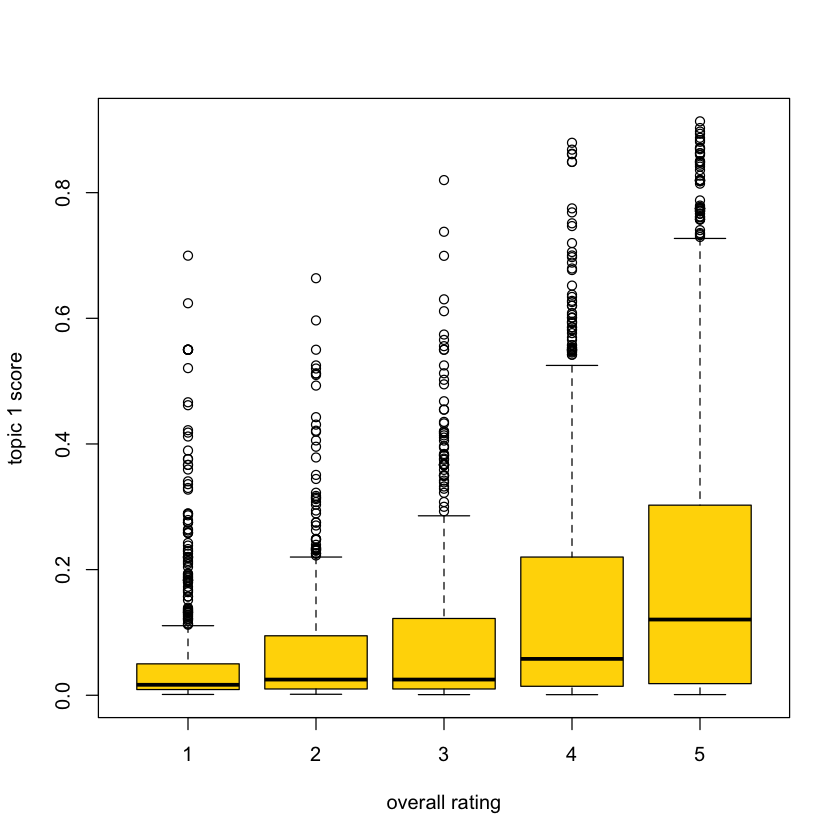

In [79]:
boxplot(tpcs$omega[,1] ~ we8thereRatings$Overall, col="gold", xlab="overall rating", ylab="topic 1 score")

Hay claramente una **relación positiva entre el tópico 1 y la calificación general**  que lo que se observaba usando el **primer componente principal (PC1)**. (HW)

y en el segundo vemos algo parecido:

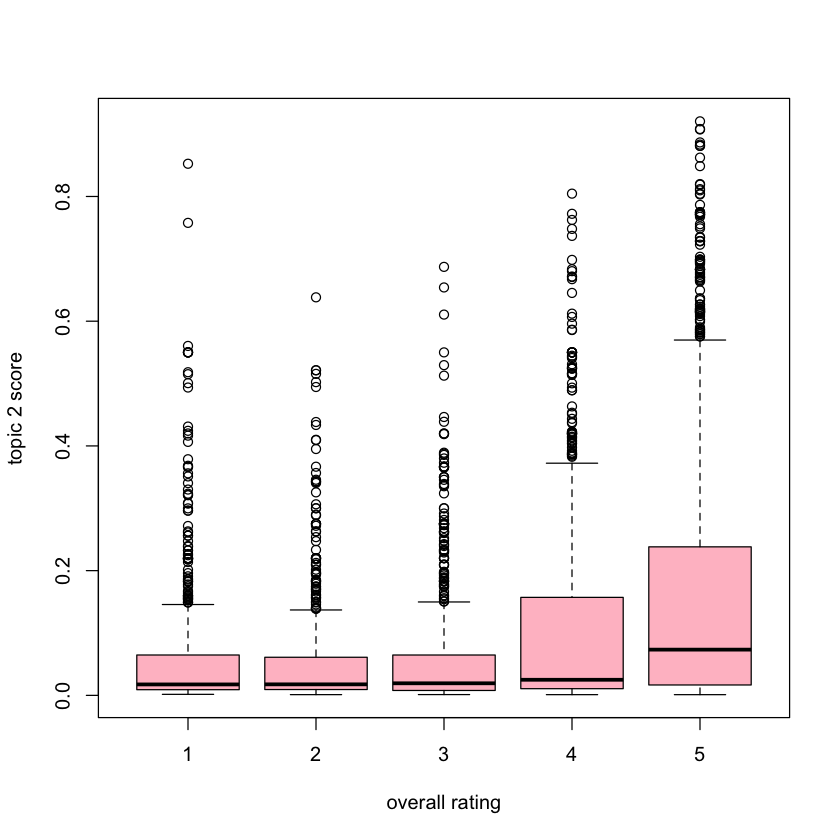

In [80]:
boxplot(tpcs$omega[,2] ~ we8thereRatings$Overall, col="pink", xlab="overall rating", ylab="topic 2 score")

Estas relaciones sugieren una estrategia de **regresión sobre tópicos** para predecir la **calificación de una reseña** a partir de su **contenido textual**.

#### Prediciendo los ratings en `we8there`

In [81]:
stars <- we8thereRatings[,"Overall"]

In [82]:
Xtopics<-as(tpcs$omega, "dMatrix")

#### Lasso temas

In [83]:
p_load("gamlr")
regtopics.cv <- cv.gamlr(tpcs$omega, stars)

#### Lasso palabras 

In [84]:
regwords.cv <- cv.gamlr(we8thereCounts, stars)

Resultados

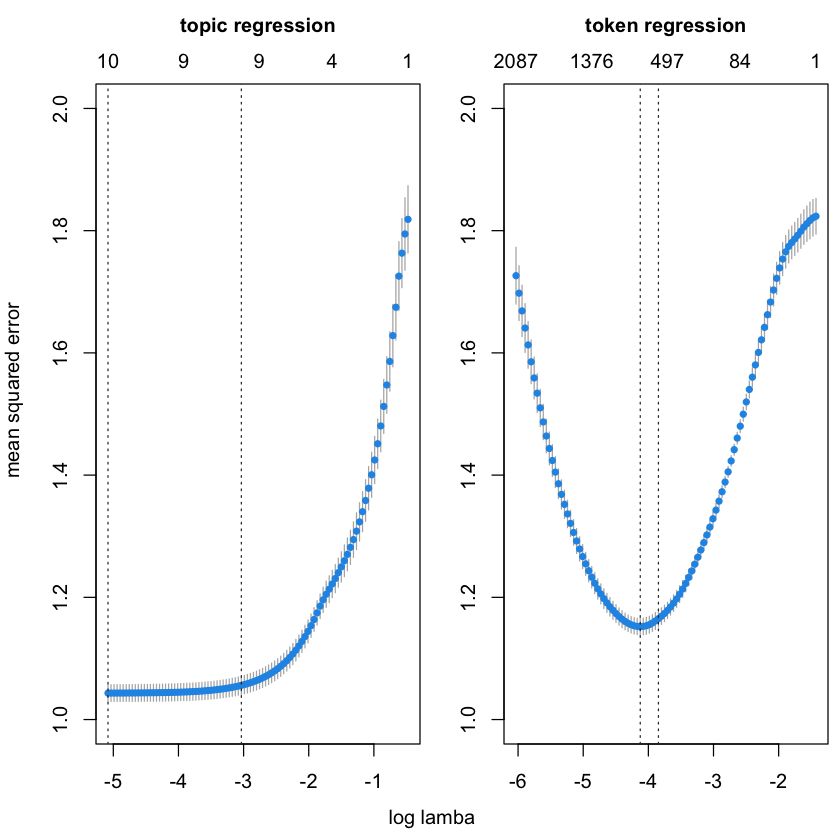

In [85]:
par(mfrow=c(1,2), mai=c(.3,.6,.7,.1), omi=c(.5,.2,0,0))
plot(regtopics.cv, ylim=c(1,2), xlab="", ylab="")
mtext("topic regression", font=2, line=2)
plot(regwords.cv, ylim=c(1,2), xlab="", ylab="")
mtext("token regression", font=2, line=2)
mtext(side=2, "mean squared error", outer=TRUE, line=0)
mtext(side=1, "log lamba", outer=TRUE, line=1)